<a href="https://colab.research.google.com/github/StillWork/AIDD-LAIDD/blob/main/z2_MoleculeRepresentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분자 표현형


- Data Representation
- [RDKit](https://www.rdkit.org/docs/index.html)을 이용해서 SMILES, Mol 파일, Fingerprint 등 화합물의 여러가지 표현형을 다루는 법을 배운다|
- RDKit은 화학물질의 여러 특성을 파악하고, 표현형을 바꾸고, 속성을 예측하는데 널리 사용되는 cheminformatics와 머신러닝용 패키지이다

## 머신러닝과 데이터 표현형

- 현재 머신러닝(machine learning)이 인공지능(artificila intelligence)을 구현하는 주요 기술이다
- 머신러닝은 "데이터 기반"의 모델을 사용하며 데이터를 보고 학습을 하여 모델의 성능을 점차 높인다
- 신약 후보물질을 찾거나, 리드 최적화를 하는 과정은 분자, 단백질 등 대상 물질에서 구조적 또는 기능적 패턴을 잘 찾는 작업을 필요로 한다
- 이러한 "지능적인" 작업을 머신러닝에게 수행시킬 때 입력 (분자의 특성 등)을 얼마나 잘 표현해주는가에 따라 모델의 성능이 크게 달라진다
 - 단순 작업인 "자동화"에서는 데이터 표현형이 대부분 미리 고정되어 있다

## QSAR
- 분자의 특성(features, X)들로부터 분자의 물리적, 화학적, 생화학적인 속성값(property, y)을 예측하는데 머신러닝이 널리 도입되고 있다
- 머신러닝 예측 모델의 성능이 우수할수록 원하는 속성값을 갖는 분자를 찾거나 설계하는데 도움이 된다
- 이러한 작업을 QSPR (quantitative structure-property relationship) 또는 QSAR (quantitative structure-activity relationship) 분석이라고 한다

- 이를 위해 전통적으로는 화학적, 물리학적, 수학적인 이론에 근거해서 이러한 문제를 풀었으나 계산량이 많이 필요하며 수식 모델은 복잡한 실제 세계를 모델링하는데 한계가 있다




## 분자 표현형

- 분자를 다루는 머신러닝의 성능을 높이려면 모델 입력(X)으로 사용하는 데이터 표현형(representation)을 잘 선택해야 한다
- 표현형은 분자의 고유한 특성을 숫자로 표현한 것이다
- 전통적으로는, X는 2차원 테이블 구조를 갖고 각 컬럼(특성)을 전문가가 직접 선택하는 방법을 사용한다
- 분자 표현형으로는 Descriptors, SMILES, Mol 파일, fingerprint, Graph 등이 있다



 <img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-22%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.13.29.png?raw=1" align="left">

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 5.0 MB/s 
     |████████████████████████████████| 29.5 MB 1.8 MB/s 


### 1. SMILES
- Simplified Molecular Input Line Entry System
- 매우 간편한 분자 표현 방식이다. 알파벳으로 된 원자 기호를 사용한다
- Single bonds는 생략하고 double, triple, quadruple bond는 각각 '=', '#', '$' 로 표현한다
- 링구조는 시작과 끝 원자에 숫자를 붙인다
- 아로마틱 원자는 소문자로 표현한다: b, c, n, o, p, s 등

- 예:

<img src="http://www.daylight.com/dayhtml/doc/theory/theory4.gif"/>

- SMILES의 장점:
 - 읽기 쉽고 사람이 작성하기도 쉽다.
 - 문장처럼, 문자열 처리 방식으로 처리가 가능하다

- 단점:
 - 분자의 공간적인 정보는 표현하지 못한다
 - 동일한 분자에 대해서도 서로다른 다양한 표현법이 있을 수 있다

In [1]:
# Glycine, Phenylalanine, Histidine, Cysteine 의 SMILES 데이터
smiles_dict = {'Glycine' : 'C(C(=O)O)N', 'Phenylalanine' : 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'Histidine' : 'O=C([C@H](CC1=CNC=N1)N)O', 'Cysteine' : 'C([C@@H](C(=O)O)N)S'}
smiles_dict

{'Glycine': 'C(C(=O)O)N',
 'Phenylalanine': 'N[C@@H](CC1=CC=CC=C1)C(O)=O',
 'Histidine': 'O=C([C@H](CC1=CNC=N1)N)O',
 'Cysteine': 'C([C@@H](C(=O)O)N)S'}

### 2. Descriptors

- 2차원 테이블 구조의, 정형화된 특성 테이블을 만들고 각 컬럼(특성)으로 분자량, 용해도, 독성, 3차원 정보, 질량, 극성, 아로마틱 등 분자의 descriptors들을 사용하는 경우이다
- 분석 목적에 따라 필요한 특성을 선택(feature selection)하거나 다양한 특성 변환 등 데이터 전처리가 필요하다
 - 이와 같이 최적의 특성을 준비하는 작업을 특성 공학 (feature engineering)이라고 한다

In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
# Descriptors를 계산하기 위해 RDKit에서 제공하는 rdkit.Chem.rdchem.Mol 객체로 변환하여 mol_dict에 key와 value로 저장
mol_dict = {}
for molecule in smiles_dict.keys():
    mol = Chem.MolFromSmiles(smiles_dict[molecule])
    mol_dict[molecule] = mol
mol_dict

{'Glycine': <rdkit.Chem.rdchem.Mol at 0x7f4f402c6270>,
 'Phenylalanine': <rdkit.Chem.rdchem.Mol at 0x7f4f402c62e0>,
 'Histidine': <rdkit.Chem.rdchem.Mol at 0x7f4f402c6350>,
 'Cysteine': <rdkit.Chem.rdchem.Mol at 0x7f4f402c63c0>}

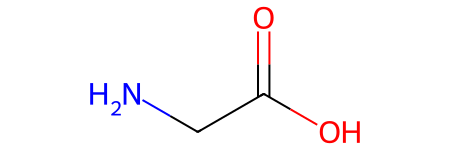

In [3]:
# 시각화
mol_dict['Glycine'] # 실습 : key값을 바꿔가며 다른 화합물의 형태로 확인해본다

In [4]:
# 확인할 화합물 변수 저장
molecule = 'Glycine'

# 분자량
print(f'{molecule}의 분자량 : ', Descriptors.ExactMolWt(mol_dict[molecule]))

# 원자 개수 <AddHs() :  mol 객체에 수소 원자를 추가로 표시한다>
print(f'{molecule}의 수소를 제외한 원자 개수 : ', Chem.AddHs(mol_dict[molecule]).GetNumAtoms())
print(f'{molecule}의 수소를 제외한 원자 개수 : ', Chem.AddHs(mol_dict[molecule]).GetNumHeavyAtoms(), end='\n\n')

# 한번에 여러가지 특성을 출력 (반환되는 딕셔너리의 key 값은 모두 RDKit의 Descriptors에서 제공하는 함수이다. 아래 예시를 통해 확인)
Desc_dict = Descriptors.CalcMolDescriptors(mol_dict[molecule])
print(Desc_dict)

# 두 출력이 동일함을 확인
print('\n아래 두 출력이 동일함을 확인')
print(f'{molecule}의 MaxAbsEStateIndex : ', Desc_dict['MaxAbsEStateIndex'])
print(f'{molecule}의 MaxAbsEStateIndex : ', Descriptors.MaxAbsEStateIndex(mol_dict[molecule]))

# 실습 : molecule에 저장된 값을 바꿔가며 다른 화합물의 특성도 확인한다.

Glycine의 분자량 :  75.0320284
Glycine의 수소를 제외한 원자 개수 :  10
Glycine의 수소를 제외한 원자 개수 :  5

{'MaxAbsEStateIndex': 9.243055555555555, 'MaxEStateIndex': 9.243055555555555, 'MinAbsEStateIndex': 0.2777777777777779, 'MinEStateIndex': -0.9675925925925923, 'qed': 0.42117088793654706, 'MolWt': 75.06700000000001, 'HeavyAtomMolWt': 70.027, 'ExactMolWt': 75.0320284, 'NumValenceElectrons': 30, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.31675597840558584, 'MinPartialCharge': -0.4802971300243957, 'MaxAbsPartialCharge': 0.4802971300243957, 'MinAbsPartialCharge': 0.31675597840558584, 'FpDensityMorgan1': 2.0, 'FpDensityMorgan2': 2.2, 'FpDensityMorgan3': 2.2, 'BCUT2D_MWHI': 16.366059254527027, 'BCUT2D_MWLOW': 10.717499991234309, 'BCUT2D_CHGHI': 1.8050321424204203, 'BCUT2D_CHGLO': -1.726114540149436, 'BCUT2D_LOGPHI': 1.4339024756587613, 'BCUT2D_LOGPLOW': -2.104229346355766, 'BCUT2D_MRHI': 5.680936538605497, 'BCUT2D_MRLOW': -0.1348391979770351, 'AvgIpc': 1.3787834934861756, 'BalabanJ': 2.847378923087672, 'B

### 3. Mol file

- SMILES는 한 줄의 스트링(문자열)로 분자를 표현하나, Mol 파일은 분자에 대한 상세한 정보를 텍스트 파일로 상세하게 표현한다: atoms, bonds, connectivity, 좌표정보 등을 포함한다

- MOL 파일 예:

<img src="https://chem.libretexts.org/@api/deki/files/112699/MOL_FILE_1.png?revision=1&size=bestfit&width=777&height=601"/>

- 장점:
    - 공간 정보를 포함한다(2D or 3D)
    - 각 분자에 대해서 동일한 하나의 표현을 갖는다

- 단점:
    - SMILES에 비해서 표현형의 크기가 크다
    - 개인이 작성하기 어렵고 필요한 특성 정보를 컴퓨터가 인식하게 하려면 새로운 데이터 처리가 필요하다

In [7]:
# 확인할 화합물 변수 저장
molecule = 'Glycine'

# rdkit.Chem.rdchem.Mol 객체를 MOL 블록으로 출력
print(Chem.MolToMolBlock(mol_dict[molecule]))



     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2990    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  2  4  1  0
  1  5  1  0
M  END



In [1]:
!mkdir data

mkdir: `data' 디렉토리를 만들 수 없습니다: 파일이 있습니다


In [8]:
# 화합물의 MOL 블록을 mol file로 저장
molecule = 'Glycine'
with Chem.SDWriter(f'data/{molecule}.mol') as w:
    w.write(mol_dict[molecule])
        
# data 폴더에 저장이 되었는지 확인해본다. (메모장에 drag & drop으로 확인 가능)
# 실습 : Phenylalanine, Histidine, Cysteine를 위와 같은 방법으로 저장해본다.

In [9]:
# 파일 하나에 여러 화합물을 저장할 때는 sdf 확장자로 저장한다.
with Chem.SDWriter(f'data/ALL.sdf') as w:
    for molecule in mol_dict.keys():
        w.write(mol_dict[molecule])
        
# data 폴더에 저장이 되었는지 확인해본다. (메모장에 drag & drop으로 확인 가능)

### 4. Coulomb matrices


- 분자 특성을 Schrödinger 방정식으로부터 추출할 수 있다는 가정에 출발
- 원자 좌표값과 전하량 등을 고려하여 분자의 구조를 표현한다

- 장점:
 - 물리 화학적으로 명확한 표현법을 제공

- 단점:
 - 계산량이 많으며 관련 데이터를 다량 확보하기기 어렵다

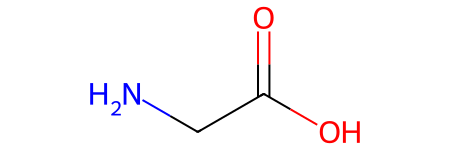

In [10]:
mol_dict['Glycine']

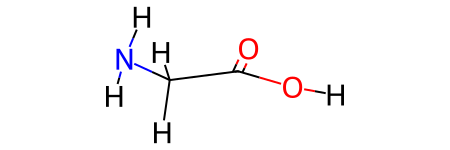

In [11]:
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcCoulombMat

# 기존 화합물에 수소원자를 추가로 표시하고 EmbedMolecule를 통해 좌표정보를 추가한다
for molecule in mol_dict.keys():
    mol_dict[molecule] = Chem.AddHs(mol_dict[molecule])
    AllChem.EmbedMolecule(mol_dict[molecule])
    
# 이미지가 입체적으로 바뀐것을 볼 수 있다 (위 셀의 이미지와 비교)
mol_dict['Glycine']

In [12]:
CM = CalcCoulombMat(mol_dict['Glycine']) # Coulomb matrices 계산
print(CM) # Coulomb matrices값을 가지고 있는 튜플 출력
print(list(CM[0])) # 첫 번째 객체를 리스트로 출력

(<rdkit.rdBase._vectdouble object at 0x0000016A09ECF440>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C6C0>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C640>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C540>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C740>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C7C0>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C840>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C8C0>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9C940>, <rdkit.rdBase._vectdouble object at 0x0000016A28C9CA40>)
[36.85810519942594, 24.264586811144078, 20.23550603150584, 19.02246352100766, 29.211986844300213, 5.398669279998304, 5.345836783081967, 1.7635451073069892, 2.900844732128948, 2.8990335119232693]


### 5. fingerprint

- 분자를 구성하는 각 원자의 특성과 결합 등을 기반으로 어떤 '숫자'들을 만들고 이를 주변의 다른 원자들과의 연결 정보를 반복적으로 추가하여 특성을 업데이트 하는 방식이다
- 각 분자의 특성을 **일정한 길이**의 비트 패턴으로 표현한다 (1024, 2048 비트 등)
- 크기가 일정한 표현형이라는 장점이 있다
- 두 분자의 특성이 유사하다면 fingerprint의 같은 위치의 비트값이 일치하는 수가 많도록 정의하였다
 - 각 비트는 어떤 특징의 존재 여부 또는 하부구조의 존재 여부 등을 나타낸다
- Extended Connectivity Fingerprint (ECFP)가 널리 사용된다
 - circular fingerprint라고도 부른다
- 이외에도 여러가지 방식의 FP가 연구되었다: 공간정보 이용, 하부구조 반영 등
- fingerprint는 분자를 찾는 키와 같은 역할을 한다
 - fingerprint는 Feature Hashing 기법이라고도 부른다



In [24]:
import numpy as np
from rdkit import DataStructs

# MorganFingerprint를 얻고 값이 1인 위치를 찾는다
# GetMorganFingerprintAsBitVect() 함수 사용

# glycine를 fingerprint로 표현
bi= {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol_dict['Glycine'], 2, nBits=1024, bitInfo=bi)
print(fp)
fp_arr = np.zeros((1,)) # array([0.])

DataStructs.ConvertToNumpyArray(fp,fp_arr) # numpy array로 변환
print(fp_arr[:30])
print(np.nonzero(fp_arr)) # 0이 아닌 값의 위치(index)를 알려준다

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
(array([ 80,  83, 124, 126, 147, 300, 341, 470, 490, 503, 628, 650, 713,
       796, 807, 893, 937], dtype=int64),)


In [18]:
print(type(fp))
print(type(fp_arr))
print(len(fp))

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'numpy.ndarray'>
1024


#### Fingerprint 비트 정보 보기
- GetOnBits() 함수 사용

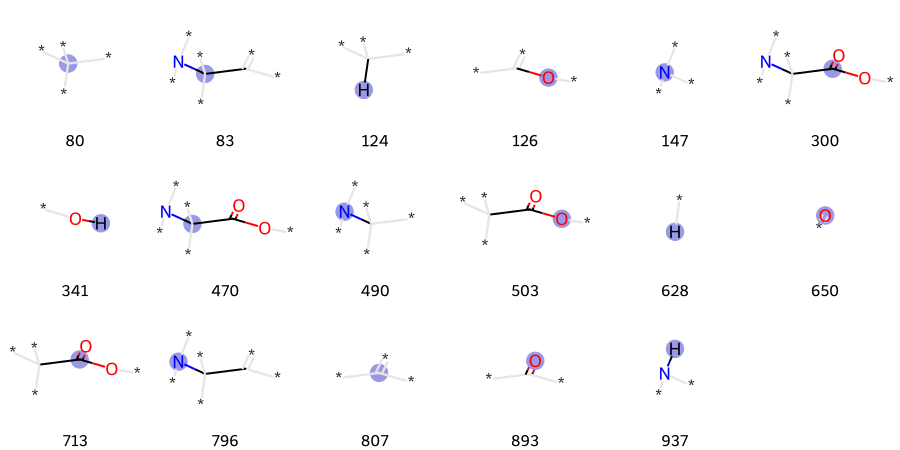

In [27]:
from rdkit.Chem import Draw

points = [(mol_dict['Glycine'], x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(points, molsPerRow=6, legends = [str(x) for x in fp.GetOnBits()])

#### 두 분자의 유사도 비교
- fingerprint를 사용하여 두 분자의 특성이 얼마나 비슷한지를 파악한다
- Tanimoto Similarity는 두 분자의 fingerprint 들의 겹치는 정도를 측정한다 (교집합/합집합)

- glycine, cysteine 비교

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202022-11-24%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%2012.05.25.png?raw=1" width= 300 align='left'>

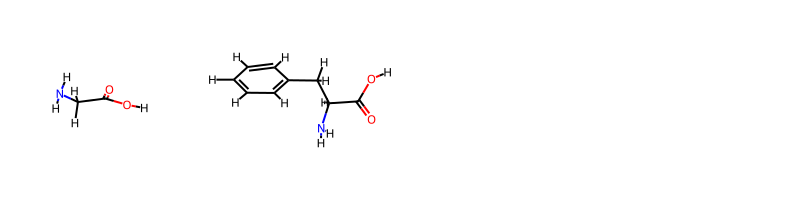

In [28]:
img = Draw.MolsToGridImage([mol_dict['Glycine'], mol_dict['Phenylalanine']], molsPerRow=4)
img

In [29]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol_dict['Phenylalanine'], 2, nBits=1024, bitInfo=bi)
print('cysteine',list(fp2.GetOnBits()))
print('glycine',list(fp.GetOnBits()))

cysteine [1, 49, 59, 80, 99, 124, 126, 147, 241, 337, 341, 350, 356, 363, 526, 602, 628, 632, 650, 656, 716, 730, 733, 807, 820, 845, 848, 849, 893, 937]
glycine [80, 83, 124, 126, 147, 300, 341, 470, 490, 503, 628, 650, 713, 796, 807, 893, 937]


In [30]:
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)

# 직접 계산
print(len(common)/len(combined))

# TanimotoSimilarity()를 사용하는 방법
print(DataStructs.TanimotoSimilarity(fp, fp2))

{807, 937, 650, 80, 147, 628, 341, 124, 893, 126}
{1, 650, 526, 656, 147, 796, 807, 937, 300, 49, 820, 59, 713, 716, 845, 80, 337, 848, 849, 83, 341, 470, 602, 730, 733, 350, 99, 356, 490, 363, 241, 628, 503, 632, 124, 893, 126}
0.2702702702702703
0.2702702702702703


### 6. 그래프

- 분자를 구성하는 원자와 결합을 노드와 엣지로 표현하는 방식이다
- 최근 분자 표현형으로 그래프가 널리 사용되고 머신러닝 모델의 성능을 개선시켰다
- 그래프 컨볼류션 네크워크 등 그래프를 지원하는 딥러닝 모델에서 사용된다 

![분자 그래프](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/basic_graphs.gif?raw=1)

In [34]:
import networkx as nx

#networkx 모듈을 통해 분자를 그래프로 표현하는 함수
def mol_to_nx(mol):
    G = nx.Graph() #빈 그래프 생성

    for atom in mol.GetAtoms(): #빈 그래프에 atome 추가하기
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds(): #빈 그래프에 bond 추가하기
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G


In [40]:
import matplotlib.pyplot as plt

Glycine_nx = mol_to_nx(mol_dict['Glycine']) # 위에 셀에서 정의한 함수을 통해 그래프로 변환

Glycine_atom = nx.get_node_attributes(Glycine_nx, 'atom_symbol') # 분자를 구성하는 원소 인덱싱

Glycine_atom

{0: 'C',
 1: 'C',
 2: 'O',
 3: 'O',
 4: 'N',
 5: 'H',
 6: 'H',
 7: 'H',
 8: 'H',
 9: 'H'}

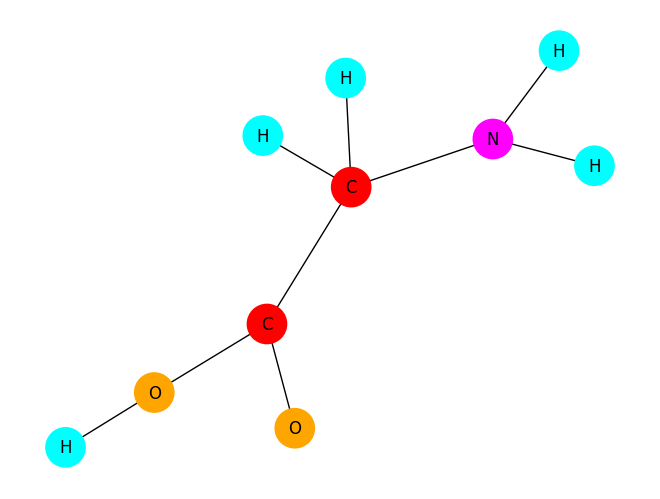

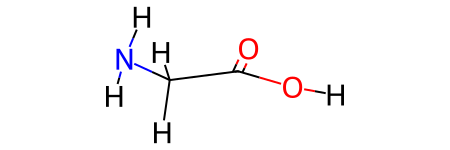

In [43]:
# 그래프 구조를 시각화 하기 위해 각 원소의 색을 지정
color_map = {'H': 'cyan',
             'C': 'red',
             'O': 'orange',
             'N': 'magenta'}

caffeine_colors = []

# 각 노드의 순서대로 원소에 맞는 색을 caffeine_colors 리스트에 저장
for idx in Glycine_nx.nodes():
    caffeine_colors.append(color_map[Glycine_nx.nodes[idx]['atom_symbol']])

    
nx.draw(Glycine_nx,
        labels=Glycine_atom,
        with_labels = True,
        node_color=caffeine_colors,
        node_size=800)

plt.show()
mol_dict['Glycine']

## Feature Learning

- 분석에 도움이 되는 특성(feature)를 선택하는 작업을 특성 공학(feature engineering)이라고 하며 주로 이 분야의 전문가가 작업하였다
- 적절한 molecular descriptor를 찾아내는 작업 등
- 특성 공학은 시간이 오래 걸리고 어려운 작업이며 작업자마다 결과가 다를 수 있다
- 딥러닝 모델은 feature learning을 수행하여 특성 공학과 같은 작업을 대신해준다
- feature learning을 representation lerning이라고도 부른다
- 사람의 개입이 아니라 데이터로부터 머신러닝 모델이 특성을 추출하는 것이다
- 이러한 방식은 이미지 인식, 언어 이해 분야에서 이미 성과를 입증했고 이제 ligand-based virtual screening 등 화학정보학, 생물정보학에도 널리 사용되고 있다

In [26]:
# Deepchem 을 이용한 특성 선택

#  deepchem이 제공하는 Dataset을 로드하면서 바로 특성을 선택할 수 있다
#  featurizer의 옵션은 다음과 같다
#  'ECFP', 'GraphConv', 'Weave', 'smiles2img' 등을 선택할 수 있다

import deepchem as dc

tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets

In [27]:
train_dataset.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [28]:
train_dataset.X.shape

(902, 1024)

## 타겟 표현형
- 단백질 등 타겟을 컴퓨터 입력 데이터로 표현하는 방법

In [ ]:
!pip install pandas-flavor
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install DeepPurpose
!pip install Bio

In [11]:
import torch
import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis

### (데이터 로드)

In [18]:
X_drug, X_target, y = load_process_DAVIS('./data/', binary=False)

Beginning Processing...
100% [........................................................] 179878 / 179878Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!


### 단백질(아미노산) 표현
- 단백질은 여러 아미노산의 다양한 조합으로 구성된다
- 아미노산은 20개의 표준 아미노산과 이외의 희귀 아미노산으로 분류된다
- 머신러닝 모델의 입력으로 사용할 단백질 데이터는 아미노산을 알파셋으로 표현한 배열로 사용한다

In [19]:
X_target[0]

'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSESSLPNLARSLLLVDQLIDL'

### 단백질의 분자량
- rdkit.Chem.rdchem.Mol 객체와 유사하게 Bio.SeqUtils.ProtParam.ProteinAnalysis객체는 단백질 데이터의 다양한 연산 도구를 제공한다

In [23]:
protein = ProteinAnalysis(X_target[0])
print(protein)
print('분자량 : ', protein.molecular_weight())

분자량 :  103883.71650000068


### 단백질의 방향족(aromaticity) 아미노산 비율, 불안정성(instability index), 등전점(isoelectric point)

In [21]:
print('방향족 : ', protein.aromaticity())
print('불안정성 : ', protein.instability_index())
print('등전점 : ', protein.isoelectric_point())

방향족 :  0.05306971904266389
불안정성 :  56.52759625390253
등전점 :  6.158641242980956


# import

In [ ]:
import deepchem as dc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import seaborn as sns
from rdkit import Chem 
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole     # 화면에 출력하기 위한 옵션
IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina' # 레티나 디스플레이 사용
from rdkit.Chem import Draw

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn import tree
from rdkit.Chem import AllChem
from rdkit import DataStructs

# 데이터

- 분자의 지질친화성 lipophilicity을 나타내는 분배계수
- 이는 물과 옥탄올에 대한 평형상태의 용해농도의 비율인 분배 계수 distribution coefficent P로 표현된다
 - P 값이 클수록 지질 친화성이 큰 것을 나타낸다 (보통 log10P를 사용한다)
 - 실험적으로 이 값을 구하려면 많은 노력이 필요하다. 

In [ ]:
# 데이터 다운로드
logP_data = pd.read_csv('https://raw.githubusercontent.com/StillWork/data/master/logP_dataset.csv', 
                names=['smiles', 'logP'])
print(logP_data.shape)
logP_data[:3]

(14610, 2)


,smiles,logP
0,C[C@H]([C@@H](C)Cl)Cl,2.3
1,C(C=CBr)N,0.3
2,CCC(CO)Br,1.3


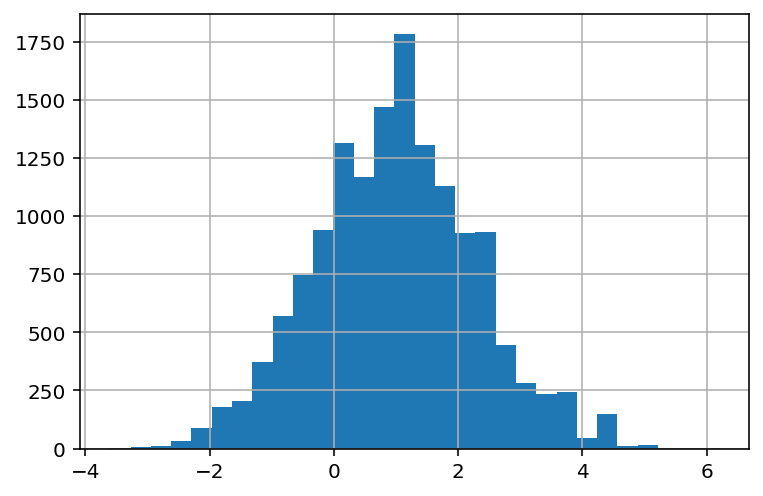

In [ ]:
logP_data.logP.hist(bins=30)

# mol 객체

- Chem.MolFromSmiles() 함수를 이용하여 SMILES로부터 Mol 객체를 얻는다

In [ ]:
df = logP_data.copy() 

In [ ]:
from rdkit import Chem 
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 

# 리스트를 생성하는 다른 방법
# df['mol'] = [Chem.MolFromSmiles(x) for x in df['smiles']] 

print(type(df['mol'][0]))

<class 'rdkit.Chem.rdchem.Mol'>


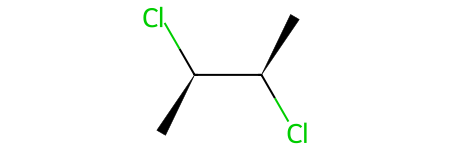

In [ ]:
df.mol[0]

## 분자 시각화

- rdkit.Chem.Draw를 사용하여 mol 객체를 시각화할 수 있다
- Draw.MolsToGridImage()를 사용하면 그리드 형태로 그릴 수 있다

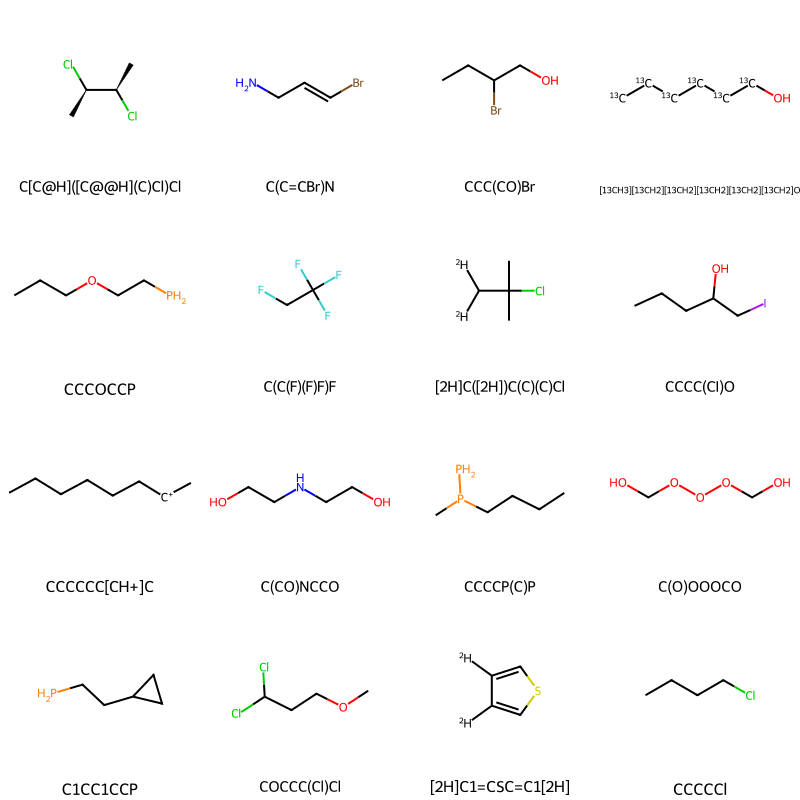

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole     
IPythonConsole.ipython_useSVG=True

# 16개를 한번에 그려보겠다
mols = df['mol'][:16]
Draw.MolsToGridImage(mols, molsPerRow=4, useSVG=True, legends=list(df['smiles'][:16].values))

# 특성 추가하기

- Chem 모듈에서 분자의 다양한 속성 정보를 추출하는 함수를 제공한다
- mol 객체로부터 분자를 구성하는 원자수를 얻으려면 다음과 같은, mol 객체가 제공하는 함수를 사용하면 된다
 - GetNumAtoms(): 모든 원자 수 얻기
 - GetNumHeavyAtoms(): 수소를 제외한 원자의 수 얻기

## 분자의 속성 정보 추가

In [ ]:
# AddHs() mol 객체에 수소 원자를 추가로 표시한다

df['mol'] = df['mol'].apply(lambda x: Chem.AddHs(x))
df['num_of_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['mol'].apply(lambda x: x.GetNumHeavyAtoms())
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aec5760d0>,14,6,4,0,0,2
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aec4835d0>,11,5,3,0,1,0
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aea9311c0>,15,6,4,1,0,0


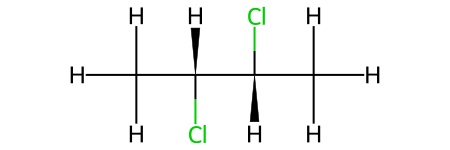

In [ ]:
df.mol[0]

- 분자를 구성하는 각 원자별 갯수를 추가하기
- GetSubstructMatches()를 사용하면 분자 내에 특정한 패턴이 들어있는지를 찾아낼 수 있다

In [ ]:
# 탄소 패턴을 지정한다
c_patt = Chem.MolFromSmiles('C')

# 이 패턴이 들어있는 곳을 찾는다. 패턴의 수를 세면 탄소 원자가 몇개 들어있는지 알 수 있다
print(df['mol'][0].GetSubstructMatches(c_patt))

((0,), (1,), (2,), (3,))


In [ ]:
# 임의의 패턴(원자)를 포함하는 수를 찾는 함수 정의
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl'], df)

In [ ]:
df[:3]

,smiles,logP,mol,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms
0,C[C@H]([C@@H](C)Cl)Cl,2.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aec349f30>,14,6,4,0,0,2
1,C(C=CBr)N,0.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aec349f80>,11,5,3,0,1,0
2,CCC(CO)Br,1.3,<rdkit.Chem.rdchem.Mol object at 0x7f1aec348080>,15,6,4,1,0,0


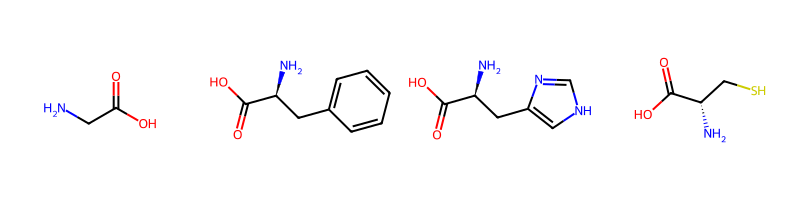

In [ ]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

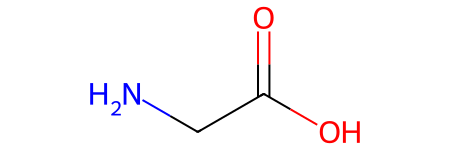

In [ ]:
glycine = mol_list[0]
glycine

In [ ]:
# fingerprint와 deepchem을 이용한 특성 선택 내용을 위 분자 표현형 설명으로 자리를 옮겼습니다.